In [1]:
# import pandas
import pandas as pd

# load bitcoin dataset
bitcoin_df = pd.read_csv('BTC-USD (2).csv')
bitcoin_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [2]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2431 non-null   object 
 1   Open       2431 non-null   float64
 2   High       2431 non-null   float64
 3   Low        2431 non-null   float64
 4   Close      2431 non-null   float64
 5   Adj Close  2431 non-null   float64
 6   Volume     2431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 133.1+ KB


In [3]:
# change the date to non-null datetime and set it as index
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], infer_datetime_format=True)
bitcoin_df.set_index('Date', inplace=True)
bitcoin_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23,21401.044922,21646.203125,20955.138672,21528.087891,21528.087891,31878280659
2022-08-24,21526.455078,21783.076172,21195.005859,21395.019531,21395.019531,31962253368
2022-08-25,21395.458984,21789.636719,21362.441406,21600.904297,21600.904297,31028679593
2022-08-26,21596.085938,21804.908203,20199.482422,20260.019531,20260.019531,42326789564
2022-08-27,20236.427734,20334.722656,20036.839844,20201.615234,20201.615234,43881558016


In [4]:
# detect missing values
bitcoin_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
bitcoin_df = bitcoin_df.loc[:, ['Close']]
bitcoin_df.tail()

,Close
Date,
2022-08-23,21528.087891
2022-08-24,21395.019531
2022-08-25,21600.904297
2022-08-26,20260.019531
2022-08-27,20201.615234


In [6]:
ethereum_df = pd.read_csv('ETH-USD (1).csv')
ethereum_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [7]:
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1753 non-null   object 
 1   Open       1753 non-null   float64
 2   High       1753 non-null   float64
 3   Low        1753 non-null   float64
 4   Close      1753 non-null   float64
 5   Adj Close  1753 non-null   float64
 6   Volume     1753 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.0+ KB


In [8]:
ethereum_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
ethereum_df['Date'] = pd.to_datetime(ethereum_df['Date'], infer_datetime_format=True)
ethereum_df.set_index('Date', inplace=True)
ethereum_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23,1622.939331,1666.676514,1569.428589,1662.769897,1662.769897,18322041914
2022-08-24,1662.695435,1686.557739,1610.099243,1657.059204,1657.059204,16780932907
2022-08-25,1657.336548,1718.183228,1656.856079,1696.457031,1696.457031,14818795695
2022-08-26,1696.324585,1698.561035,1498.771240,1507.782837,1507.782837,26713710143
2022-08-27,1505.448120,1516.847046,1478.902466,1503.878052,1503.878052,27216099328


In [10]:
ethereum_df = ethereum_df.loc[:, ['Close']]
ethereum_df.tail()

,Close
Date,
2022-08-23,1662.769897
2022-08-24,1657.059204
2022-08-25,1696.457031
2022-08-26,1507.782837
2022-08-27,1503.878052


In [11]:
tether_df = pd.read_csv('USDT-USD (1).csv')
tether_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,1.01087,1.01327,0.996515,1.00818,1.00818,358188000
1,2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016
2,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968
3,2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032
4,2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032


In [12]:
tether_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1753 non-null   object 
 1   Open       1753 non-null   float64
 2   High       1753 non-null   float64
 3   Low        1753 non-null   float64
 4   Close      1753 non-null   float64
 5   Adj Close  1753 non-null   float64
 6   Volume     1753 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.0+ KB


In [13]:
tether_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
tether_df['Date'] = pd.to_datetime(tether_df['Date'], infer_datetime_format=True)
tether_df.set_index('Date', inplace=True)
tether_df = tether_df.loc[:, ['Close']]
tether_df.tail()

,Close
Date,
2022-08-23,0.999992
2022-08-24,1.000039
2022-08-25,1.000080
2022-08-26,1.000043
2022-08-27,1.000083


In [15]:
joined_df = bitcoin_df.join(ethereum_df, how='outer', rsuffix=' Ethereum').join(tether_df, how='outer', rsuffix=' Tether')
joined_df.dropna(inplace=True)
joined_df

,Close,Close Ethereum,Close Tether
Date,,,
2017-11-09,7143.580078,320.884003,1.008180
2017-11-10,6618.140137,299.252991,1.006010
2017-11-11,6357.600098,314.681000,1.008990
2017-11-12,5950.069824,307.907990,1.012470
2017-11-13,6559.490234,316.716003,1.009350
...,...,...,...
2022-08-23,21528.087891,1662.769897,0.999992
2022-08-24,21395.019531,1657.059204,1.000039
2022-08-25,21600.904297,1696.457031,1.000080


In [16]:
joined_df.isnull().sum()

Close             0
Close Ethereum    0
Close Tether      0
dtype: int64

In [17]:
df = joined_df.rename(columns={"Close" : "Close Bitcoin"})
df = df['2018':]
df

,Close Bitcoin,Close Ethereum,Close Tether
Date,,,
2018-01-01,13657.200195,772.640991,1.007280
2018-01-02,14982.099609,884.443970,1.004900
2018-01-03,15201.000000,962.719971,1.013440
2018-01-04,15599.200195,980.921997,1.002530
2018-01-05,17429.500000,997.719971,0.998634
...,...,...,...
2022-08-23,21528.087891,1662.769897,0.999992
2022-08-24,21395.019531,1657.059204,1.000039
2022-08-25,21600.904297,1696.457031,1.000080


In [18]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21',
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-27'],
              dtype='datetime64[ns]', name='Date', length=1700, freq=None)

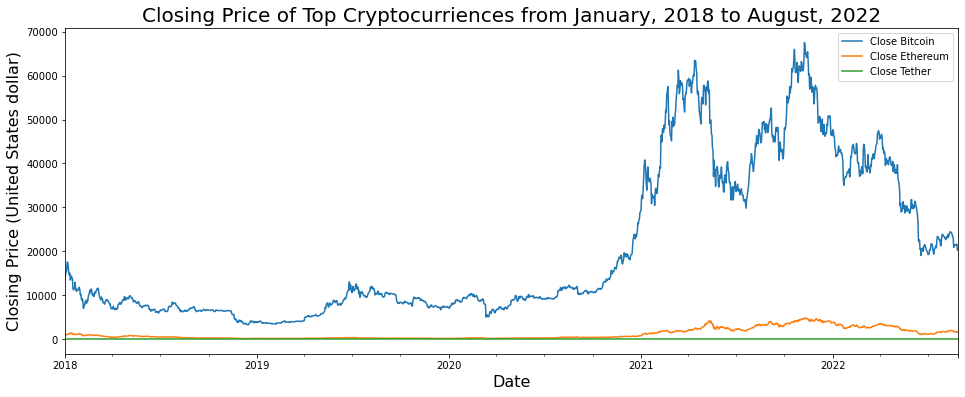

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = df.plot(figsize=(16,6))
ax.set_ylabel('Closing Price (United States dollar)', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Closing Price of Top Cryptocurriences from January, 2018 to August, 2022', fontsize=20)
plt.show;

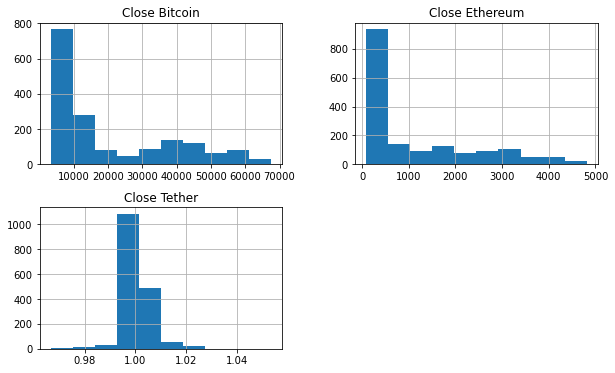

In [20]:
df.hist(figsize=(10,6));

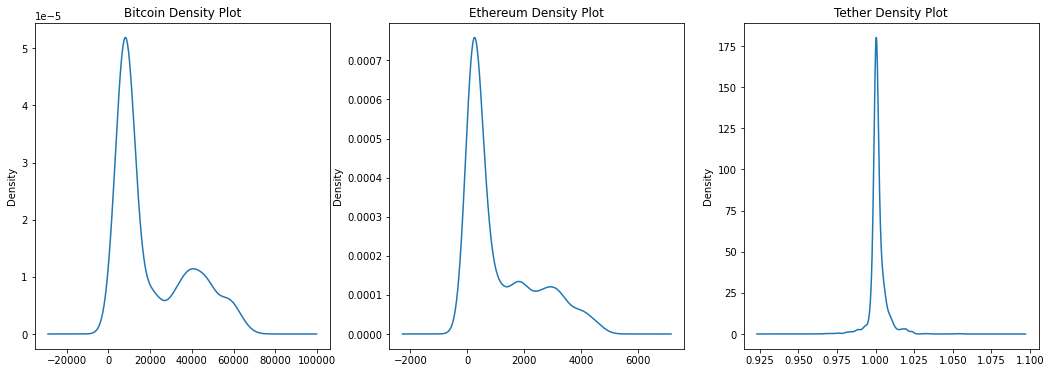

In [21]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
df['Close Bitcoin'].plot(kind='kde', ax=axes[0])
axes[0].set_title('Bitcoin Density Plot')
df['Close Ethereum'].plot(kind='kde', ax=axes[1])
axes[1].set_title('Ethereum Density Plot')
df['Close Tether'].plot(kind='kde', ax=axes[2])
axes[2].set_title('Tether Density Plot');

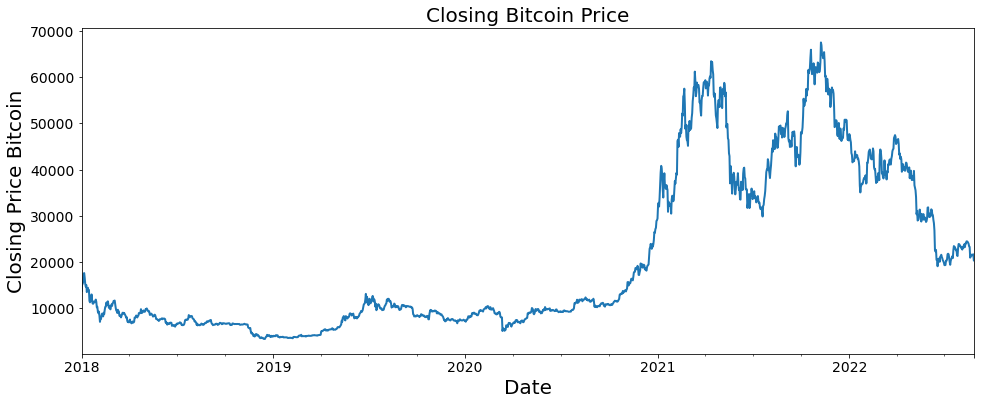

In [22]:
df['Close Bitcoin'].plot(figsize=(16,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Price Bitcoin', fontsize=20)
plt.title('Closing Bitcoin Price', fontsize=20);

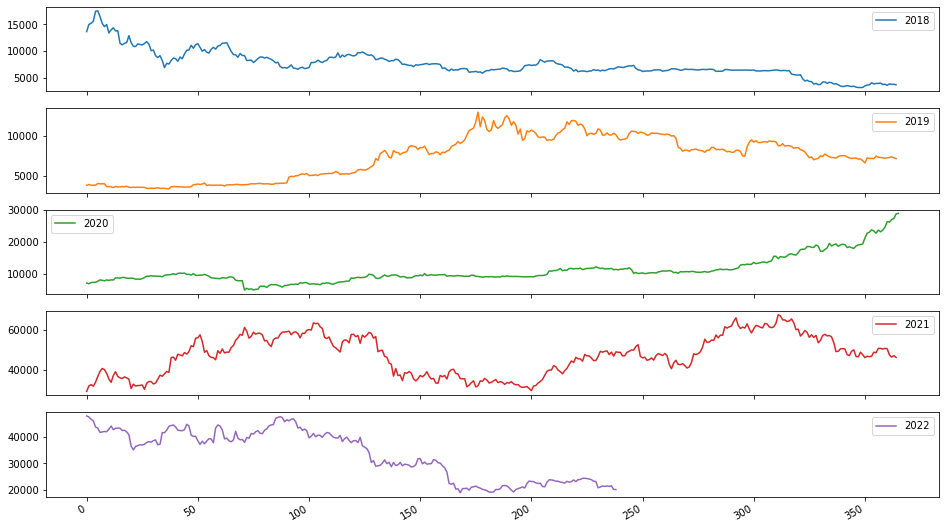

In [23]:
bitcoin = df['Close Bitcoin']
groups_yearly = bitcoin.groupby(pd.Grouper(freq='A'))
year_bitcoin = pd.concat([pd.DataFrame(x[1].values) for x in groups_yearly], axis=1)
year_df_bitcoin = pd.DataFrame(year_bitcoin)
year_df_bitcoin.columns = ['2018', '2019', '2020', '2021', '2022']
year_df_bitcoin.plot(figsize=(16,10), subplots=True, legend=True);

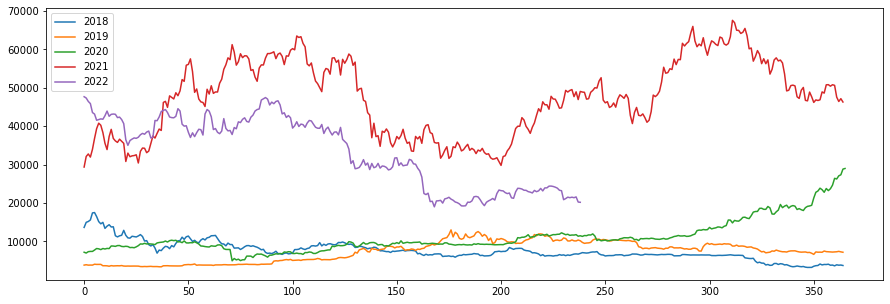

In [24]:
year_df_bitcoin.plot(figsize = (15,5), subplots=False, legend=True);

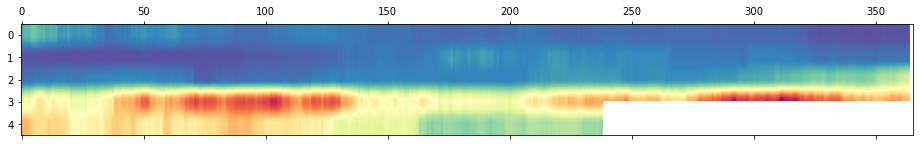

In [25]:
year_matrix = year_df_bitcoin.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

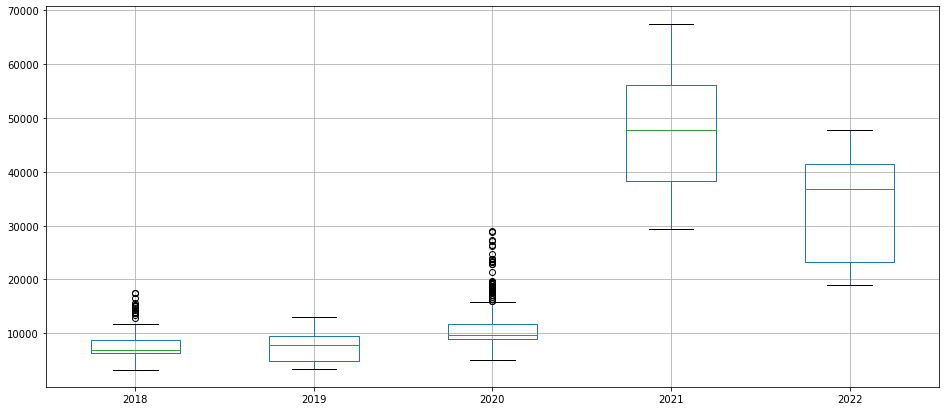

In [26]:
year_df_bitcoin.boxplot(figsize=(16,7));

In [27]:
cutoff_bitcoin = round(df['Close Bitcoin'].shape[0]*0.8)
cutoff_bitcoin

1360

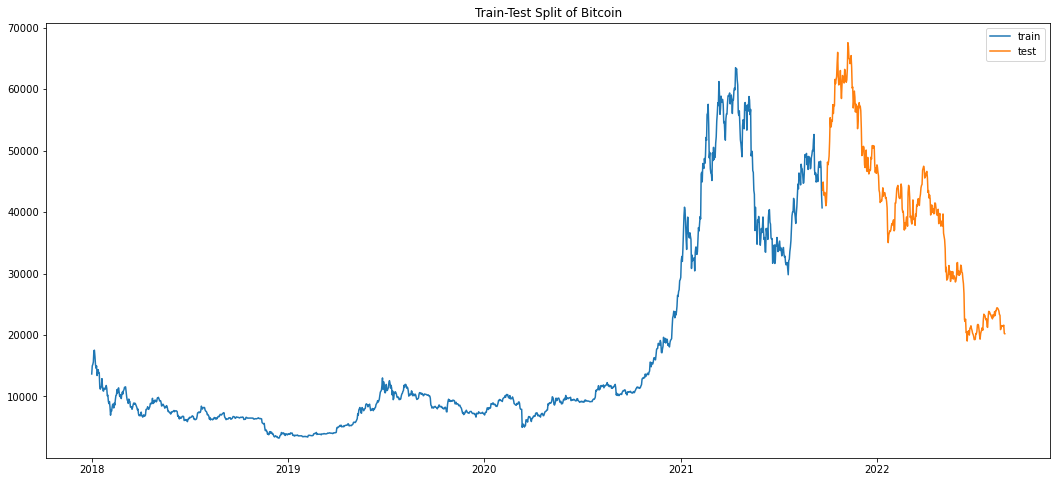

In [28]:
train_bitcoin = df['Close Bitcoin'][:cutoff_bitcoin]
test_bitcoin = df['Close Bitcoin'][cutoff_bitcoin:]
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(train_bitcoin, label='train')
ax.plot(test_bitcoin, label='test')
ax.set_title('Train-Test Split of Bitcoin')
plt.legend();

In [29]:
from sklearn.model_selection import TimeSeriesSplit
split = TimeSeriesSplit()
for train_ind, val_ind in split.split(train_bitcoin):
    print(train_ind, val_ind)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229] [230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 2

Baseline Model

Baseline model can be built with the help of shift operator. The prediction for the next day is the original series shifted to the future.

In [30]:
train_bitcoin

Date
2018-01-01    13657.200195
2018-01-02    14982.099609
2018-01-03    15201.000000
2018-01-04    15599.200195
2018-01-05    17429.500000
                  ...     
2021-09-17    47267.519531
2021-09-18    48278.363281
2021-09-19    47260.218750
2021-09-20    42843.800781
2021-09-21    40693.675781
Name: Close Bitcoin, Length: 1360, dtype: float64

In [31]:
naive = train_bitcoin.shift(1)
naive

Date
2018-01-01             NaN
2018-01-02    13657.200195
2018-01-03    14982.099609
2018-01-04    15201.000000
2018-01-05    15599.200195
                  ...     
2021-09-17    47783.359375
2021-09-18    47267.519531
2021-09-19    48278.363281
2021-09-20    47260.218750
2021-09-21    42843.800781
Name: Close Bitcoin, Length: 1360, dtype: float64

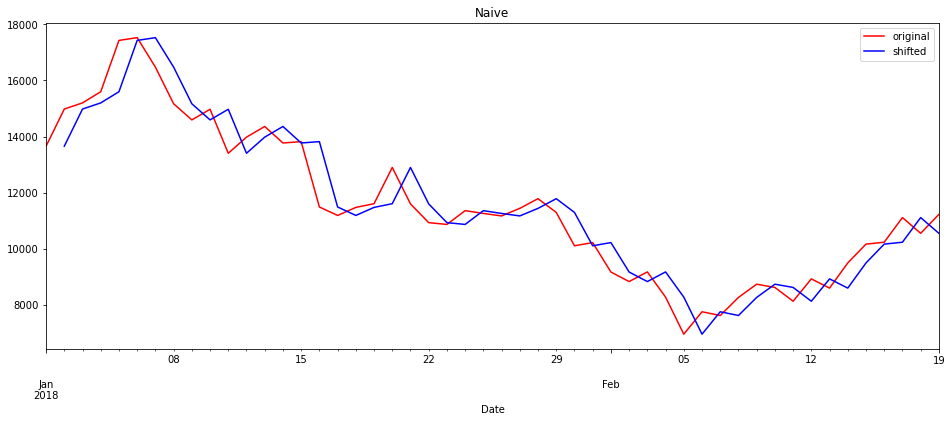

In [33]:
fig, ax = plt.subplots(figsize=(16,6))
train_bitcoin[0:50].plot(ax=ax, c='r', label='original')
naive[0:50].plot(ax=ax, c='b', label='shifted')
ax.set_title('Naive')
ax.legend();

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train_bitcoin[1:], naive.dropna()))

919.5902315711276

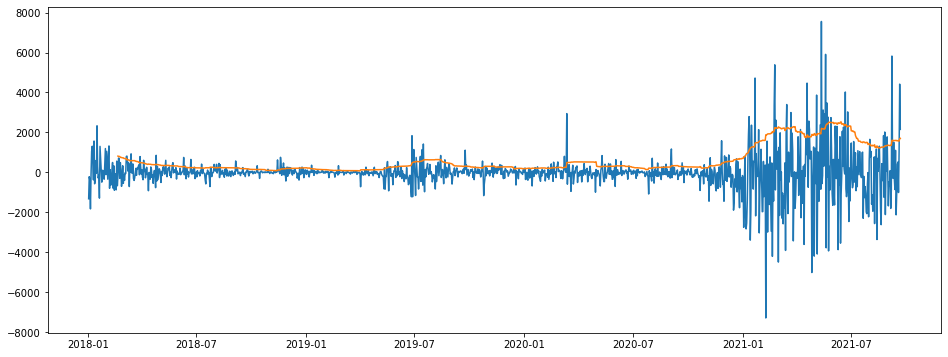

In [37]:
fig, ax = plt.subplots(figsize=(16,6))
residuals = naive[1:] - train_bitcoin[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(50).std());

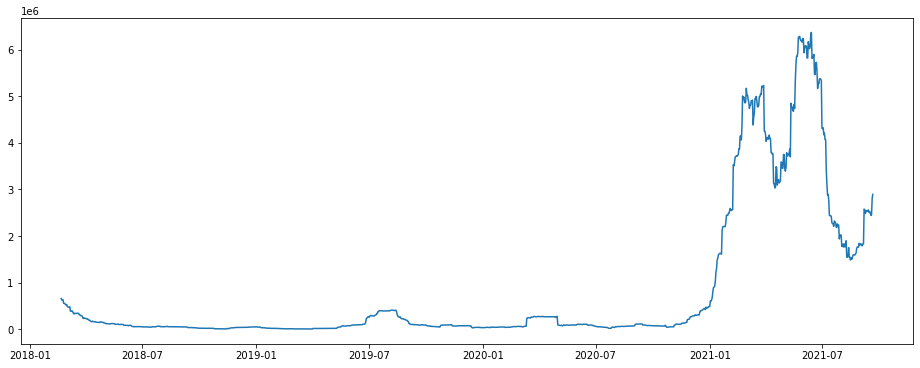

In [38]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(residuals.index, residuals.rolling(50).var());

If we look at the rolling standard deviation of our errors, we can see that the performance of the model varies at different points in time.

This is the result of the trends in the data.

Let's check how the differenced data would look like.

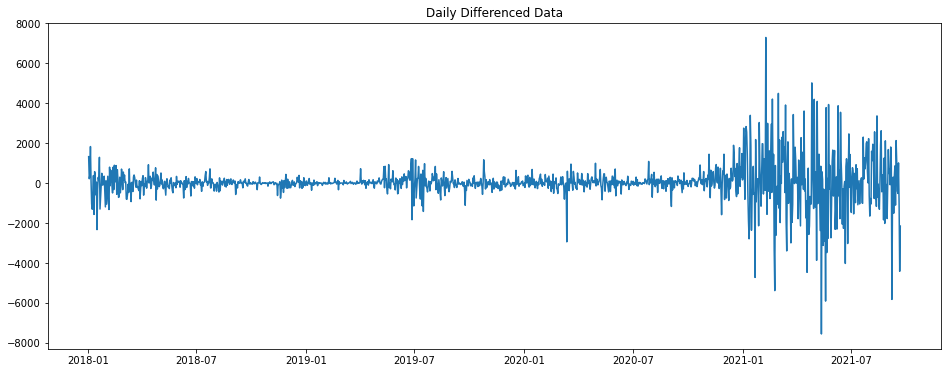

In [42]:
fig, ax = plt.subplots(figsize=(16,6))
train_bitcoin_diff = train_bitcoin.diff()
ax.plot(train_bitcoin_diff)
ax.set_title('Daily Differenced Data');

In [43]:
def stationarity_check(DF):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = DF.rolling(window=8, center=False).mean()
    roll_std = DF.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(DF) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(16,6))
    orig = plt.plot(DF, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None


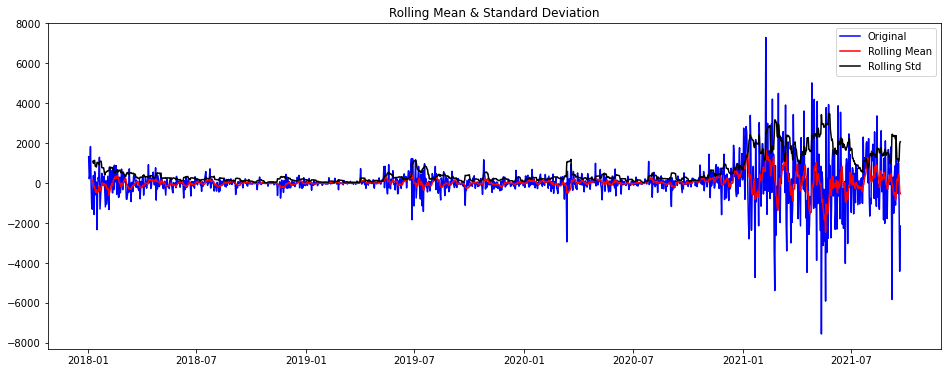

Results of Dickey-Fuller Test: 

Test Statistic                -7.181121e+00
p-value                        2.648272e-10
#Lags Used                     2.300000e+01
Number of Observations Used    1.335000e+03
Critical Value (1%)           -3.435258e+00
Critical Value (5%)           -2.863707e+00
Critical Value (10%)          -2.567924e+00
dtype: float64


In [45]:
stationarity_check(train_bitcoin_diff.dropna())

In [46]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
random_walk_bitcoin = ARIMA(train_bitcoin, order=(0,1,0)).fit()
y_hat_rw = random_walk_bitcoin.predict(typ='levels')
y_hat_rw

2018-01-01        0.000000
2018-01-02    13657.200195
2018-01-03    14982.099609
2018-01-04    15201.000000
2018-01-05    15599.200195
                  ...     
2021-09-17    47783.359375
2021-09-18    47267.519531
2021-09-19    48278.363281
2021-09-20    47260.218750
2021-09-21    42843.800781
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [47]:
random_walk_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11202.056
Date:                Wed, 31 Aug 2022   AIC                          22406.112
Time:                        06:37:30   BIC                          22411.327
Sample:                    01-01-2018   HQIC                         22408.064
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       8.45e+05   1.11e+04     75.795      0.000    8.23e+05    8.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.26   Jarque-Bera (JB):             12633.83
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              19.02   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
# Check the RMSE
np.sqrt(mean_squared_error(train_bitcoin, y_hat_rw))

991.0453092619374

In [49]:
train_bitcoin_with_ind = train_bitcoin.reset_index()
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(0,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2025.3055250690218
5068.898602547114
1365.8540041819417
12235.638534664951
11594.694137143915


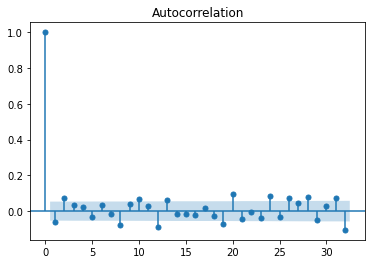

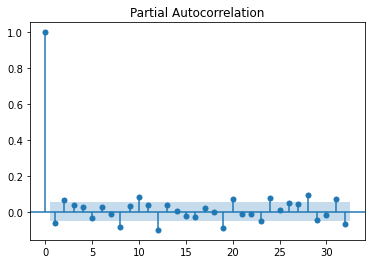

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train_bitcoin_diff.dropna())
plot_pacf(train_bitcoin_diff.dropna());

AR model might be investigated first with lag length selected from the PACF or via empirical investigation. In our case, it's clearly that within 1 lag the AR is significant. Which means, we can use AR = 1. 

The series show negative significant correlation at lag 1 as well, which suggests adding MA term equal to 1.

In [51]:
ar_1_bitcoin = ARIMA(train_bitcoin, order=(1,1,0)).fit()
y_hat_ar1 = ar_1_bitcoin.predict(typ='levels')
y_hat_ar1

2018-01-01        0.000000
2018-01-02    13326.683713
2018-01-03    14912.050482
2018-01-04    15189.426456
2018-01-05    15578.146841
                  ...     
2021-09-17    47804.137168
2021-09-18    47294.792643
2021-09-19    48224.918679
2021-09-20    47314.049354
2021-09-21    43077.302448
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [52]:
ar_1_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -11200.098
Date:                Wed, 31 Aug 2022   AIC                          22404.196
Time:                        06:38:11   BIC                          22414.625
Sample:                    01-01-2018   HQIC                         22408.100
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0529      0.015     -3.421      0.001      -0.083      -0.023
sigma2      8.417e+05   1.12e+04     75.098      0.000     8.2e+05    8.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             12452.20
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              18.53   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ar1))

989.8182707989566

In [54]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(1,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2015.9549888154156
5066.3774069258025
1365.8380567597862
12234.239618990656
11610.208916769272


In [55]:
ma_1_bitcoin = ARIMA(train_bitcoin, order=(0,1,1)).fit()
y_hat_ma1 = ma_1_bitcoin.predict(typ='levels')
y_hat_ma1

2018-01-01        0.000000
2018-01-02    13368.485608
2018-01-03    14907.443177
2018-01-04    15187.402317
2018-01-05    15580.125485
                  ...     
2021-09-17    47799.030545
2021-09-18    47292.139421
2021-09-19    48232.680836
2021-09-20    47305.263742
2021-09-21    43050.458258
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [56]:
ma_1_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -11200.342
Date:                Wed, 31 Aug 2022   AIC                          22404.684
Time:                        06:38:51   BIC                          22415.113
Sample:                    01-01-2018   HQIC                         22408.588
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0463      0.016     -2.979      0.003      -0.077      -0.016
sigma2      8.411e+05   1.12e+04     75.383      0.000    8.19e+05    8.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):             12494.97
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):              18.59   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ma1))

989.9696626496157

In [58]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(0,1,1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2016.3448778270567
5066.6681927682075
1365.837922632544
12234.280774721821
11612.423158917187


In [59]:
arma_model_bitcoin = ARIMA(train_bitcoin, order=(1,1,1)).fit()
y_hat_train = arma_model_bitcoin.predict(typ='levels')
y_hat_train

2018-01-01        0.000000
2018-01-02    13284.751211
2018-01-03    15107.350887
2018-01-04    15120.024093
2018-01-05    15620.788538
                  ...     
2021-09-17    47790.914894
2021-09-18    47292.680747
2021-09-19    48207.201453
2021-09-20    47356.950280
2021-09-21    43041.698104
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [60]:
arma_model_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11198.454
Date:                Wed, 31 Aug 2022   AIC                          22402.908
Time:                        06:39:15   BIC                          22418.551
Sample:                    01-01-2018   HQIC                         22408.764
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6036      0.137     -4.409      0.000      -0.872      -0.335
ma.L1          0.5468      0.146      3.748      0.000       0.261       0.833
sigma2      8.407e+05   1.13e+04     74.365      0.000    8.19e+05    8.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12338.32
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              18.41   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_train))

988.7909425527404

In [62]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(1,1,1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2023.3400323623084
5060.404589973139
1331.8352352475258
12234.266137989238
11613.318285862437


In [63]:
import itertools
p = range(0, 11)
q = range(0, 11)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))
ans = []
for comb in pdq:
    try:
        mod = ARIMA(train_bitcoin,
                    order=comb)

        output = mod.fit()
        ans.append([comb, output.aic])
    except:
        continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq    (8, 1, 7)
aic      22331.1
Name: 95, dtype: object

In [64]:
arma_bitcoin = ARIMA(train_bitcoin, order=(8,1,7)).fit()
yhat_train = arma_bitcoin.predict(typ='levels')
yhat_train

2018-01-01        0.000000
2018-01-02    13375.398599
2018-01-03    15327.373531
2018-01-04    15703.934918
2018-01-05    15865.840404
                  ...     
2021-09-17    47786.914277
2021-09-18    47358.454774
2021-09-19    47745.798384
2021-09-20    46914.943199
2021-09-21    42988.323900
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [65]:
arma_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:                 ARIMA(8, 1, 7)   Log Likelihood              -11149.554
Date:                Wed, 31 Aug 2022   AIC                          22331.107
Time:                        06:42:31   BIC                          22414.539
Sample:                    01-01-2018   HQIC                         22362.342
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1393      0.609     -0.229      0.819      -1.332       1.054
ar.L2          0.3608      0.615      0.587      0.557      -0.844       1.565
ar.L3         -0.1333      0.329     -0.406      0.685      -0.777       0.511
ar.L4          0.1290      0.376      0.343      0.732      -0.609       0.867
ar.L5         -0.4389      0.253     -1.738      0.082      -0.934       0.056
ar.L6         -0.0890      0.488     -0.183      0.855      -1.045       0.867
ar.L7          0.7614      0.478      1.592      0.111      -0.176       1.699
ar.L8         -0.0417      0.042     -0.984      0.325      -0.125       0.041
ma.L1          0.1110      0.608      0.183      0.855      -1.081       1.303
ma.L2         -0.2747      0.602     -0.456      0.648      -1.454       0.905
ma.L3          0.2131      0.369      0.578      0.563      -0.510       0.936
ma.L4         -0.1495      0.457     -0.327      0.744      -1.045       0.746
ma.L5          0.4300      0.313      1.374      0.170      -0.184       1.044
ma.L6          0.1013      0.536      0.189      0.850      -0.949       1.151
ma.L7         -0.7738      0.530     -1.459      0.144      -1.813       0.265
sigma2      8.036e+05    1.3e+04     61.773      0.000    7.78e+05    8.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              9084.59
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              15.86   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
np.sqrt(mean_squared_error(train_bitcoin, yhat_train))

958.6401843795355

In [67]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(8,1,10)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

1908.9720095907242
5040.880089746854
1403.241216178726
12345.858883703346
11030.231355990412


In [68]:
print(random_walk_bitcoin.aic)
print(ar_1_bitcoin.aic)
print(ma_1_bitcoin.aic)
print(arma_model_bitcoin.aic)
print(arma_bitcoin.aic)

22406.11206801693
22404.195727115308
22404.68376298904
22402.907583691285
22331.107145482034


In [69]:
def find_rmse(model, train_data=train_bitcoin):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))

In [70]:
print(find_rmse(random_walk_bitcoin))
print(find_rmse(ar_1_bitcoin))
print(find_rmse(ma_1_bitcoin))
print(find_rmse(arma_model_bitcoin))
print(find_rmse(arma_bitcoin))

991.0453092619374
989.8182707989566
989.9696626496157
988.7909425527404
958.6401843795355


In [71]:
test_bitcoin

Date
2021-09-22    43574.507813
2021-09-23    44895.097656
2021-09-24    42839.750000
2021-09-25    42716.593750
2021-09-26    43208.539063
                  ...     
2022-08-23    21528.087891
2022-08-24    21395.019531
2022-08-25    21600.904297
2022-08-26    20260.019531
2022-08-27    20201.615234
Name: Close Bitcoin, Length: 340, dtype: float64

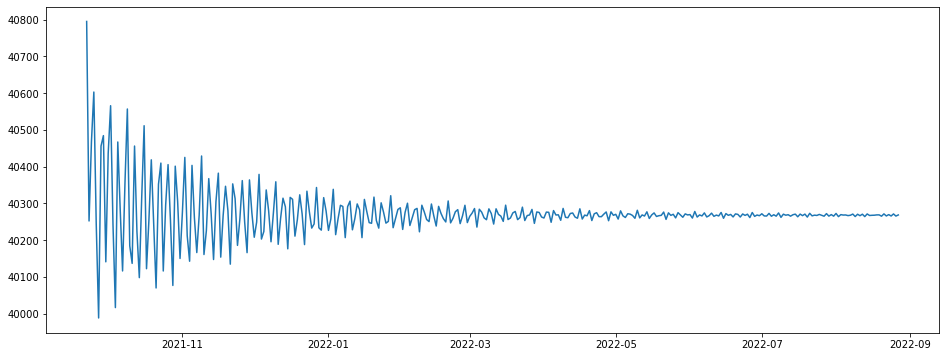

In [83]:
y_hat_test = arma_bitcoin.predict(start=test_bitcoin.index[0], end=test_bitcoin.index[-1], typ='levels')
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(y_hat_test);

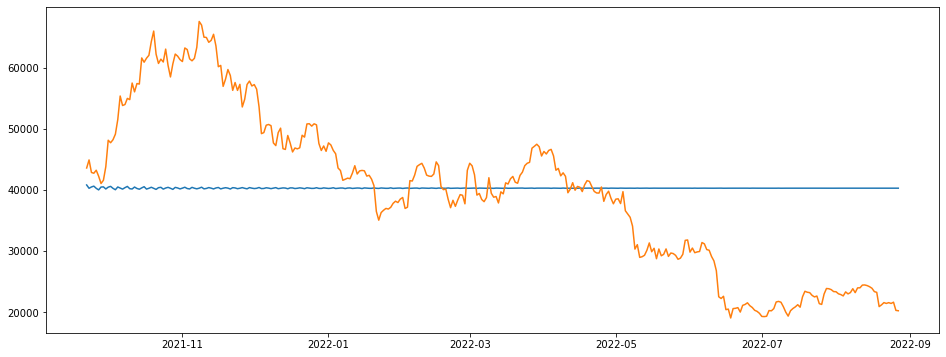

In [84]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(y_hat_test)
ax.plot(test_bitcoin);

In [75]:
np.sqrt(mean_squared_error(test_bitcoin, y_hat_test))

12978.393596476853

The predictions on the test set certainly leave something to be desired. Let's look at the autocorrelation of the original series.

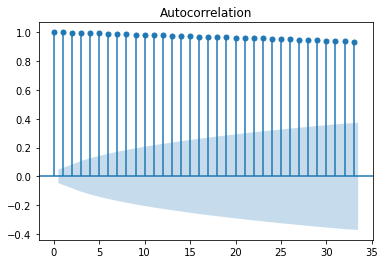

In [76]:
plot_acf(df['Close Bitcoin']);

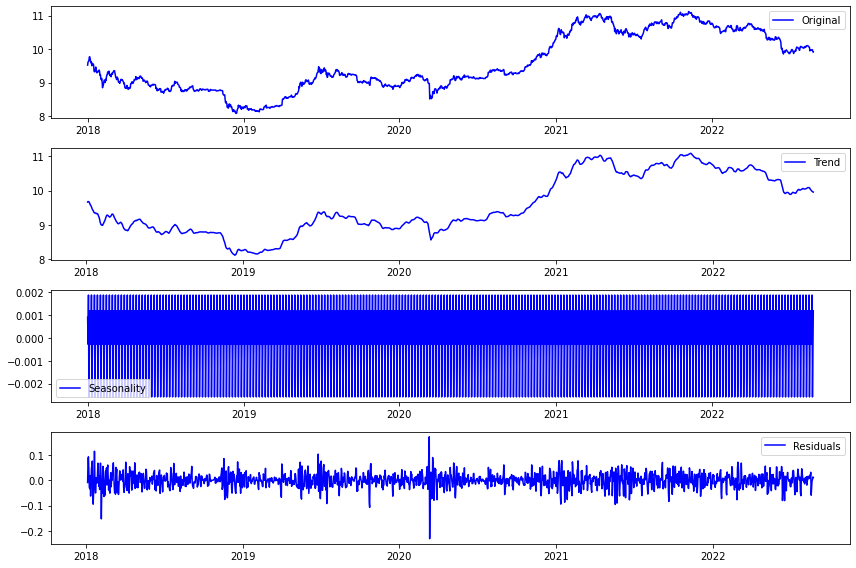

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(df['Close Bitcoin']))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(df['Close Bitcoin']), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

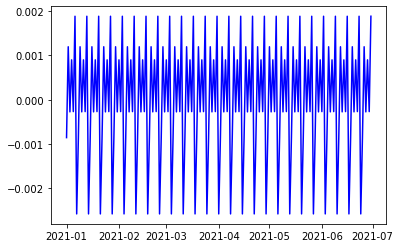

In [87]:
plt.plot(seasonal['2021-01':'2021-06'], label='Seasonality', color='blue');

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, [1], q))]

In [78]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = SARIMAX(train_bitcoin,
                          order=comb,
                          seasonal_order=combs,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
        except:
            continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (0, 1, 2)
pdqs    (0, 1, 2, 7)
aic          22037.9
Name: 20, dtype: object

In [79]:
sari_bitcoin = SARIMAX(train_bitcoin, 
                       order=(0, 1, 2), 
                       seasonal_order=(0, 1, 2, 7), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False).fit()

In [80]:
sari_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                     Close Bitcoin   No. Observations:                 1360
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 7)   Log Likelihood              -11013.933
Date:                           Wed, 31 Aug 2022   AIC                          22037.865
Time:                                   06:48:08   BIC                          22063.849
Sample:                               01-01-2018   HQIC                         22047.601
                                    - 09-21-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0651      0.016     -4.102      0.000      -0.096      -0.034
ma.L2          0.0763      0.014      5.293      0.000       0.048       0.105
ma.S.L7       -1.0208      0.018    -57.684      0.000      -1.056      -0.986
ma.S.L14       0.0208      0.012      1.752      0.080      -0.002       0.044
sigma2      8.393e+05   2.13e-08   3.95e+13      0.000    8.39e+05    8.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11886.29
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              25.66   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.67e+27. Standard errors may be unstable.
"""

In [81]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    sarimax = SARIMAX(endog = train_bitcoin_with_ind.iloc[train_ind, -1],
                      order=(0,1,2),
                      seasonal_order=(0,1,2,7),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

918.6365905524269
5852.523273948382
1367.973748418706
12374.585583586422
15447.250508189858


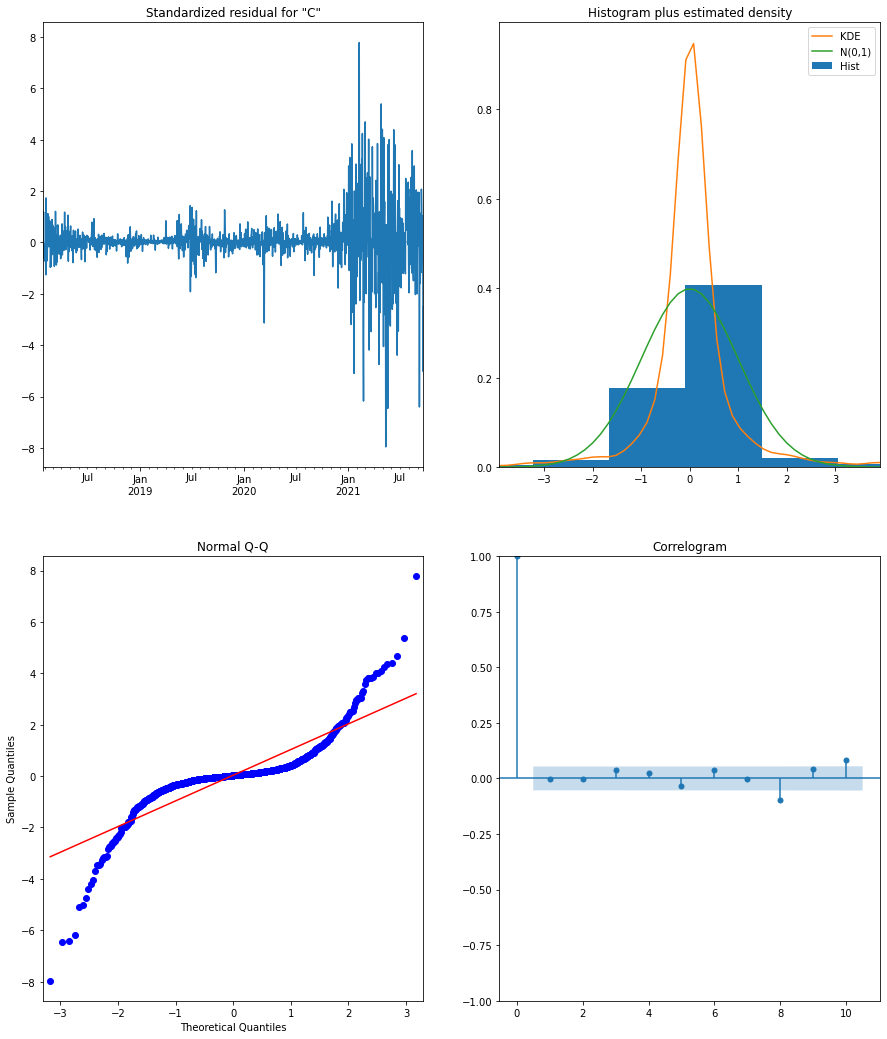

In [82]:
sari_bitcoin.plot_diagnostics(figsize=(15, 18))
plt.show()

In order to move forward, the residuals should remain uncorrelated and normally distributed having zero mean. According to the plots, we have the absence of these assumptions because:

1) The residual errors seem to fluctuate around a mean of zero without having a uniform variance.

2) Most of the dots do not fall in line with the red line. These significant deviations prove the skewed distribution.


In [101]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
train_bitcoin_log = transformer.fit_transform(train_bitcoin)
train_bitcoin_log.head()

Date
2018-01-01    9.522095
2018-01-02    9.614678
2018-01-03    9.629182
2018-01-04    9.655039
2018-01-05    9.765977
Name: Close Bitcoin, dtype: float64

In [102]:
test_bitcoin_log = transformer.transform(test_bitcoin)
test_bitcoin_log.head()

Date
2021-09-22    10.682251
2021-09-23    10.712106
2021-09-24    10.665245
2021-09-25    10.662366
2021-09-26    10.673817
Name: Close Bitcoin, dtype: float64

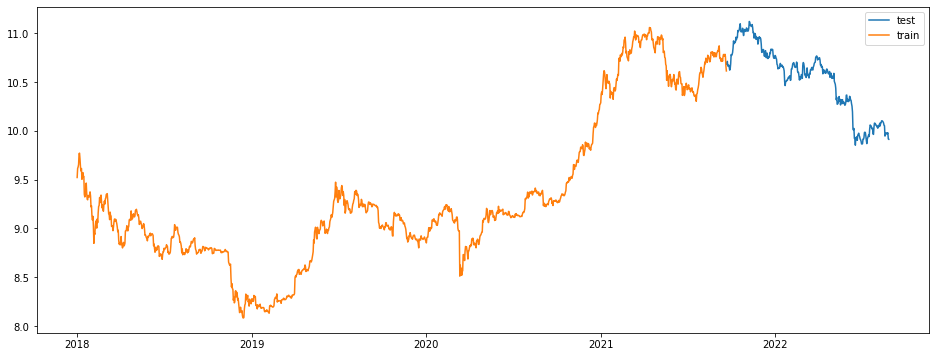

In [107]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(test_bitcoin_log, label='test')
ax.plot(train_bitcoin_log, label='train')
plt.legend();

In [103]:
sari_bitcoin_2 = SARIMAX(train_bitcoin_log, 
                         order=(0, 1, 2), 
                         seasonal_order=(0, 1, 2, 7), 
                         enforce_stationarity=False, 
                         enforce_invertibility=False).fit()

In [104]:
sari_bitcoin_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                     Close Bitcoin   No. Observations:                 1360
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 7)   Log Likelihood                2382.538
Date:                           Wed, 31 Aug 2022   AIC                          -4755.076
Time:                                   08:10:02   BIC                          -4729.092
Sample:                               01-01-2018   HQIC                         -4745.340
                                    - 09-21-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0617      0.022     -2.753      0.006      -0.106      -0.018
ma.L2          0.0621      0.025      2.504      0.012       0.013       0.111
ma.S.L7       -1.0215      0.018    -56.344      0.000      -1.057      -0.986
ma.S.L14       0.0272      0.017      1.617      0.106      -0.006       0.060
sigma2         0.0016   2.52e-05     64.178      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             11822.68
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.99
Prob(H) (two-sided):                  0.87   Kurtosis:                        17.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
train_bitcoin_with_ind = train_bitcoin_log.reset_index()
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    sarimax = SARIMAX(endog = train_bitcoin_with_ind.iloc[train_ind, -1],
                      order=(0,1,2),
                      seasonal_order=(0,1,2,7),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

0.20154221702217637
1.1210181158852552
0.1737424539842148
0.7283309082909133
0.39300733863829557


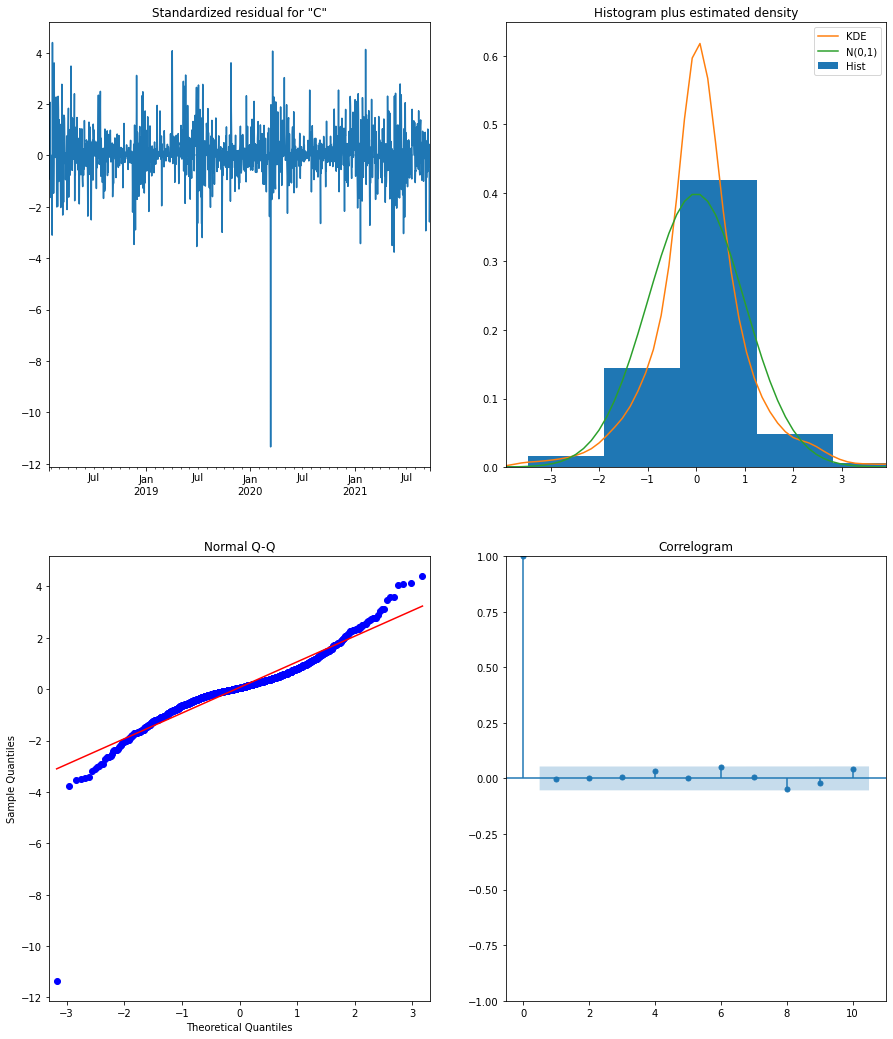

In [105]:
sari_bitcoin_2.plot_diagnostics(figsize=(15, 18))
plt.show()

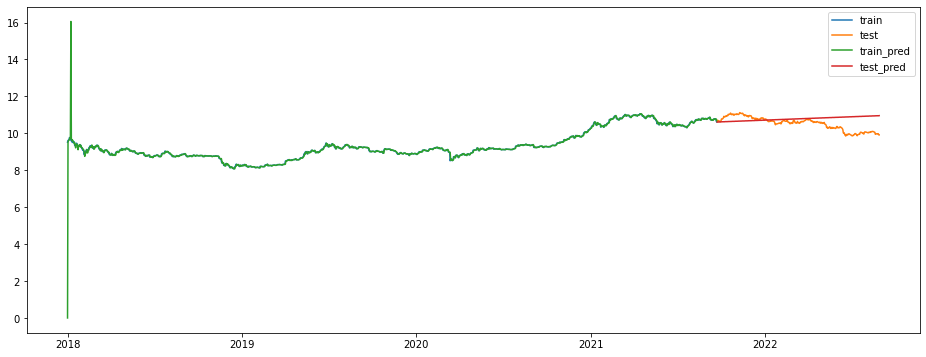

In [106]:
y_hat_train = sari_bitcoin_2.predict(typ='levels')
y_hat_test = sari_bitcoin_2.predict(start=test_bitcoin_log.index[0], end=test_bitcoin_log.index[-1], typ='levels')
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(train_bitcoin_log, label='train')
ax.plot(test_bitcoin_log, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')
plt.legend();

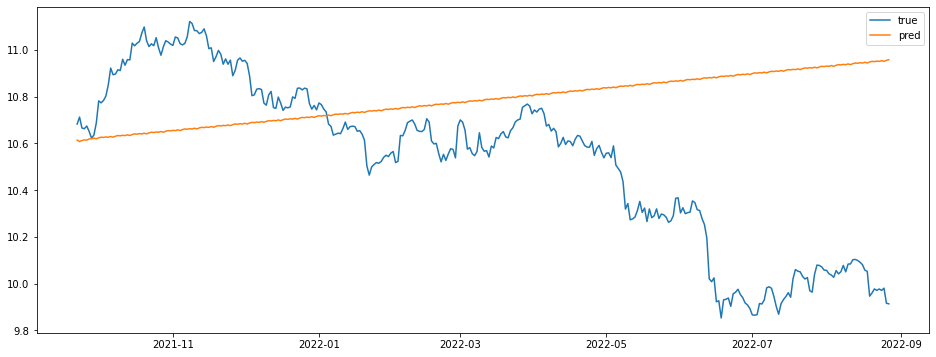

In [108]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(test_bitcoin_log, label='true')
ax.plot(y_hat_test, label='pred')
plt.legend();

In [110]:
np.sqrt(mean_squared_error(test_bitcoin_log, y_hat_test))

0.5113916790753331

In [120]:
sari_bitcoin_2 = SARIMAX(df['Close Bitcoin'], 
                         order=(0, 1, 2), 
                         seasonal_order=(0, 1, 2, 7), 
                         enforce_stationarity=False, 
                         enforce_invertibility=False).fit()

In [121]:
prediction = sari_bitcoin_2.get_forecast(steps=183)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

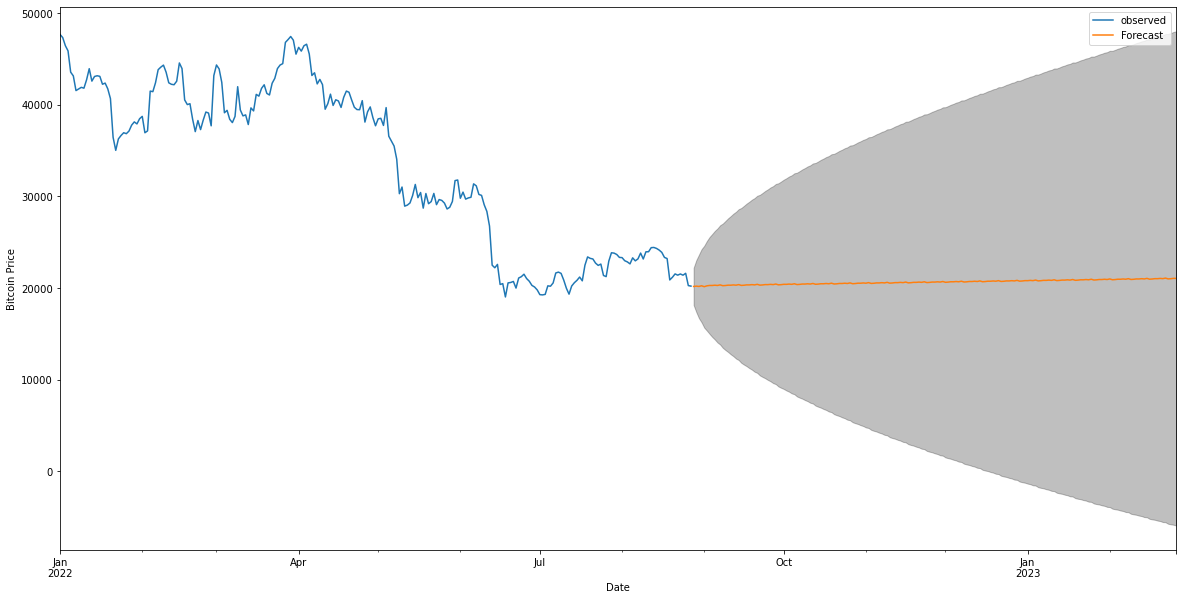

In [122]:
ax = df['Close Bitcoin']['2022':].plot(label='observed', figsize=(20, 10))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price')

plt.legend()
plt.show()

In [ ]:
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from prophet import Prophet


In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
values_train = train_bitcoin.values
values_train = values_train.reshape(len(values_train), 1)
scaler.fit(values_train)
train_bitcoin_scaled = pd.DataFrame(
    scaler.transform(values_train),
    index=train_bitcoin.index
)

train_bitcoin_scaled.head()

,0
Date,
2018-01-01,0.172905
2018-01-02,0.194889
2018-01-03,0.198522
2018-01-04,0.205129
2018-01-05,0.235499


In [93]:
values_test = test_bitcoin.values
values_test = values_test.reshape(len(values_test), 1)

test_bitcoin_scaled = pd.DataFrame(
    scaler.transform(values_test), 
    index=test_bitcoin.index
)
test_bitcoin_scaled.head()

,0
Date,
2021-09-22,0.669321
2021-09-23,0.691233
2021-09-24,0.657129
2021-09-25,0.655085
2021-09-26,0.663248


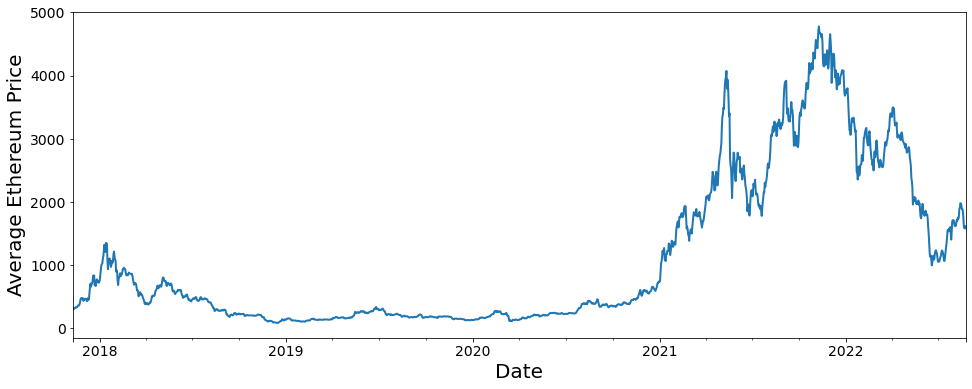

In [120]:
df['Average Price Ethereum'].plot(figsize=(16,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Average Ethereum Price', fontsize=20);

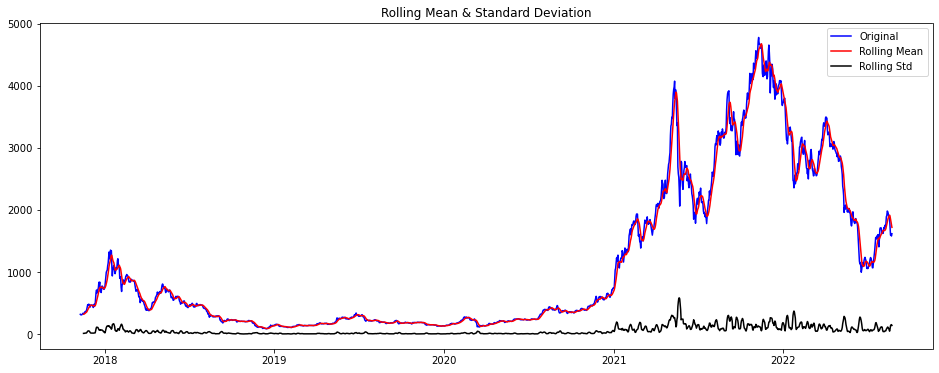

Results of Dickey-Fuller Test: 

Test Statistic                   -1.394762
p-value                           0.584785
#Lags Used                        8.000000
Number of Observations Used    1740.000000
Critical Value (1%)              -3.434114
Critical Value (5%)              -2.863202
Critical Value (10%)             -2.567655
dtype: float64


In [128]:
stationarity_check(df['Average Price Ethereum'])

 not stationary

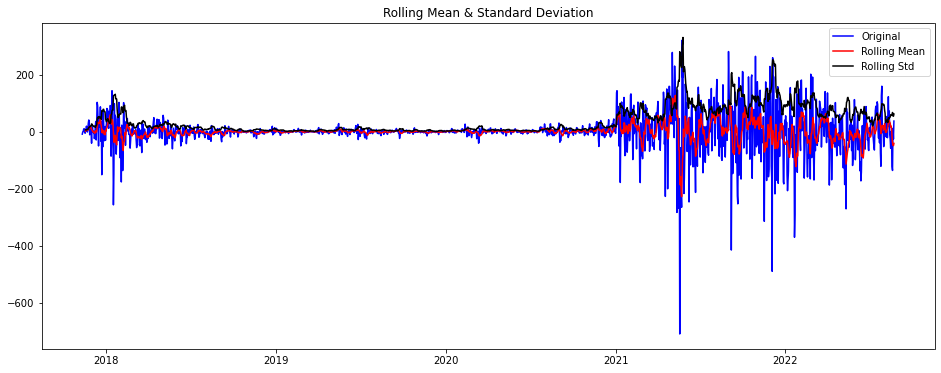

Results of Dickey-Fuller Test: 

Test Statistic                -7.382072e+00
p-value                        8.421422e-11
#Lags Used                     2.500000e+01
Number of Observations Used    1.722000e+03
Critical Value (1%)           -3.434153e+00
Critical Value (5%)           -2.863220e+00
Critical Value (10%)          -2.567664e+00
dtype: float64


In [129]:
ethereum_diff = df['Average Price Ethereum'].diff(periods=1)
ethereum_diff.dropna(inplace=True)
stationarity_check(ethereum_diff)

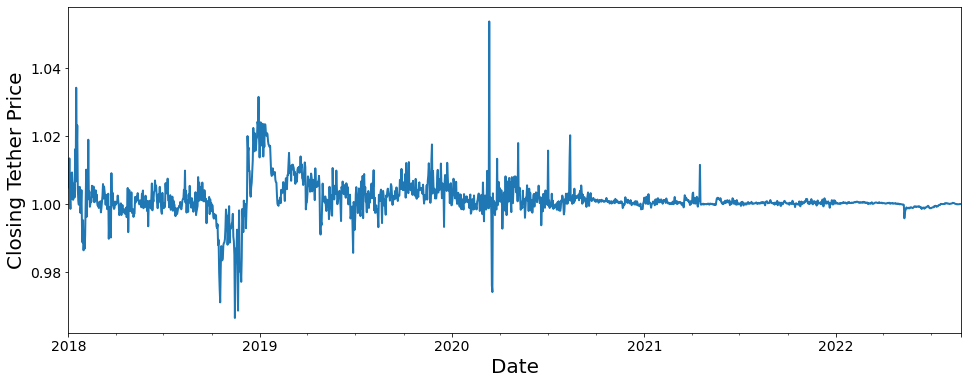

In [115]:
df['Close Tether'].plot(figsize=(16,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Tether Price', fontsize=20);

In [7]:
year_groups = tether_df.groupby(pd.Grouper(freq ='A'))
# Create a new DataFrame and store yearly values in columns 
tether_annual = pd.DataFrame()

for yr, group in year_groups:
    tether_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
tether_annual.plot(figsize = (13,8), subplots=True, legend=True);

ValueError: Length of values (365) does not match length of index (53)

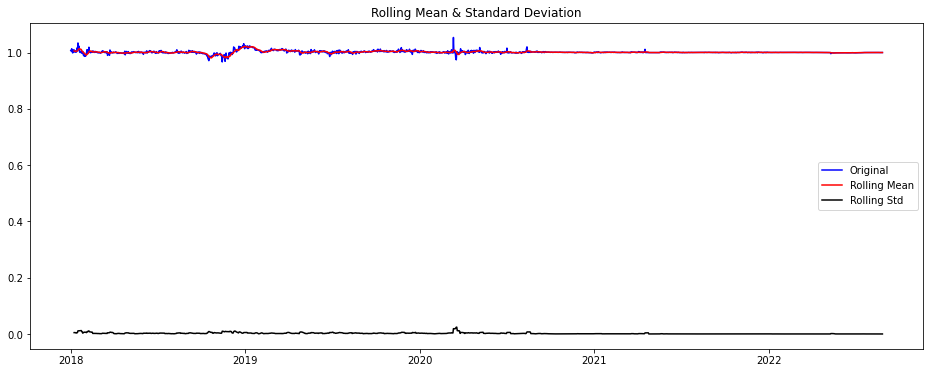

Results of Dickey-Fuller Test: 

Test Statistic                -6.102470e+00
p-value                        9.760752e-08
#Lags Used                     6.000000e+00
Number of Observations Used    1.693000e+03
Critical Value (1%)           -3.434218e+00
Critical Value (5%)           -2.863249e+00
Critical Value (10%)          -2.567680e+00
dtype: float64


In [117]:
stationarity_check(df['Close Tether'])

Tether is stationary (test statistic is less than critical value)

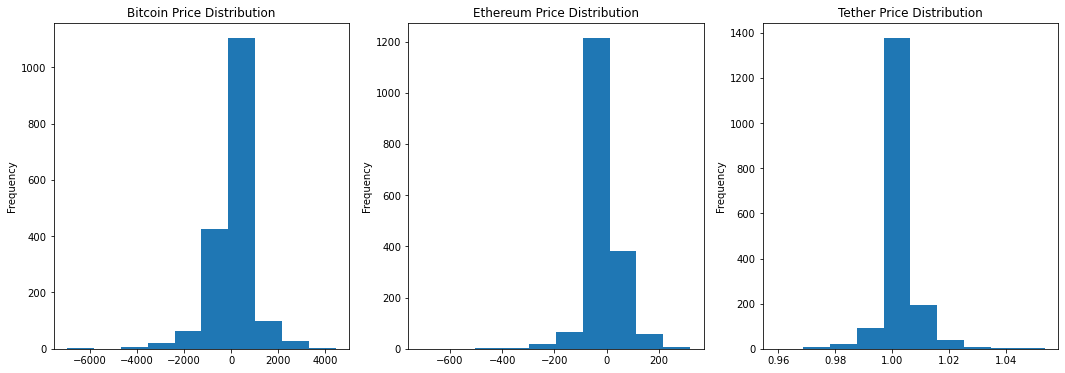

In [132]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
bitcoin_diff.plot(kind='hist', ax=axes[0])
axes[0].set_title('Bitcoin Price Distribution')
ethereum_diff.plot(kind='hist', ax=axes[1])
axes[1].set_title('Ethereum Price Distribution')
df['Average Price Tether'].plot(kind='hist', ax=axes[2])
axes[2].set_title('Tether Price Distribution');

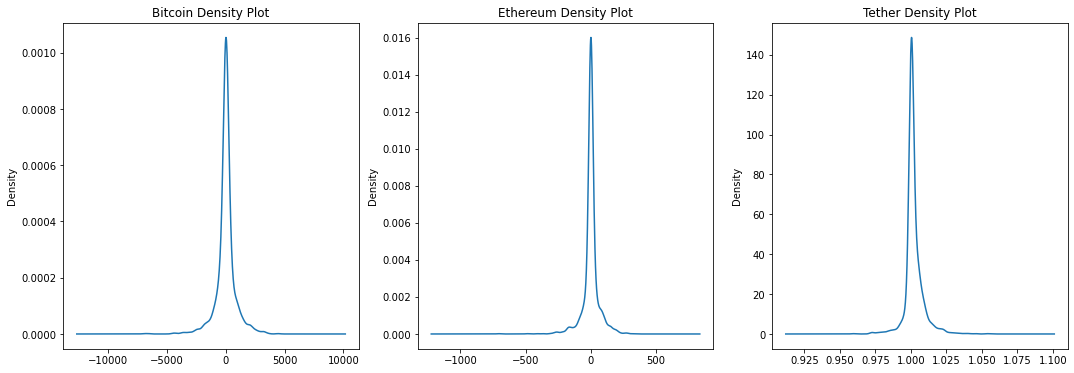

In [133]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
bitcoin_diff.plot(kind='kde', ax=axes[0])
axes[0].set_title('Bitcoin Density Plot')
ethereum_diff.plot(kind='kde', ax=axes[1])
axes[1].set_title('Ethereum Density Plot')
df['Average Price Tether'].plot(kind='kde', ax=axes[2])
axes[2].set_title('Tether Density Plot');

Nothing is white noise process since mean and std are not constant over time

In [137]:
bitcoin = pd.DataFrame(bitcoin_diff)
ethereum = pd.DataFrame(ethereum_diff)
final_df = bitcoin.join(
    ethereum, how='outer', rsuffix=' Ethereum').join(
    df['Average Price Tether'], how='outer', rsuffix=' Tether')
final_df.dropna(inplace=True)
final_df

,Average Price Bitcoin,Average Price Ethereum,Average Price Tether
Date,,,
2017-11-10,-399.739990,-8.624009,1.009858
2017-11-11,-335.750000,-0.807495,1.011005
2017-11-12,-466.655273,0.010513,1.036755
2017-11-13,255.710205,8.886994,1.002197
2017-11-14,285.625000,10.750000,1.005164
...,...,...,...
2022-08-19,-1329.636719,-122.450257,1.000061
2022-08-20,-937.311523,-135.958313,1.000053
2022-08-21,282.252930,11.732727,1.000052


In [138]:
final_df.corr()

,Average Price Bitcoin,Average Price Ethereum,Average Price Tether
Average Price Bitcoin,1.000000,0.754439,-0.001664
Average Price Ethereum,0.754439,1.000000,0.019570
Average Price Tether,-0.001664,0.019570,1.000000


The average price for ethereum and bitcoin are highly correlated

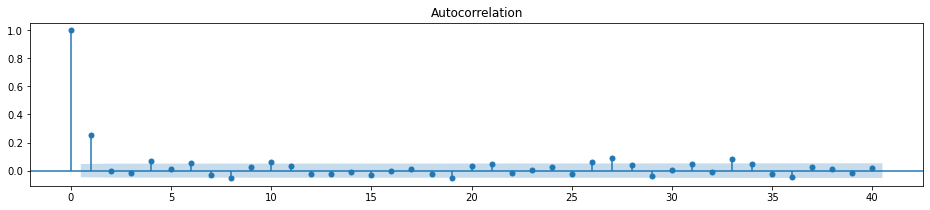

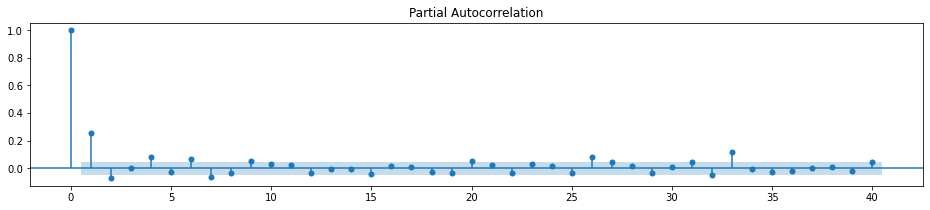

In [157]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Bitcoin'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Bitcoin'], ax=ax, lags=40);

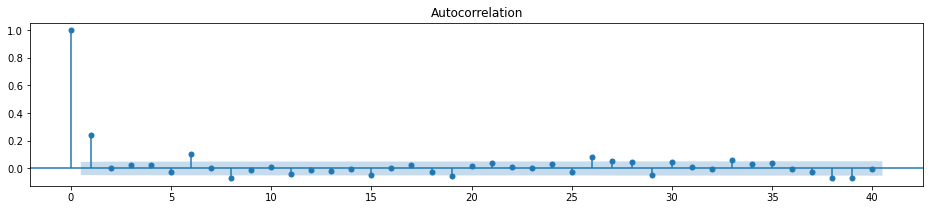

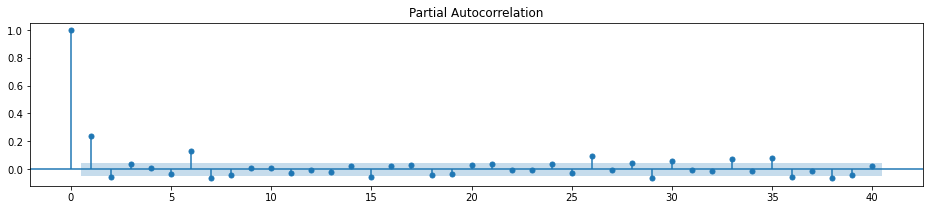

In [158]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Ethereum'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Ethereum'], ax=ax, lags=40);

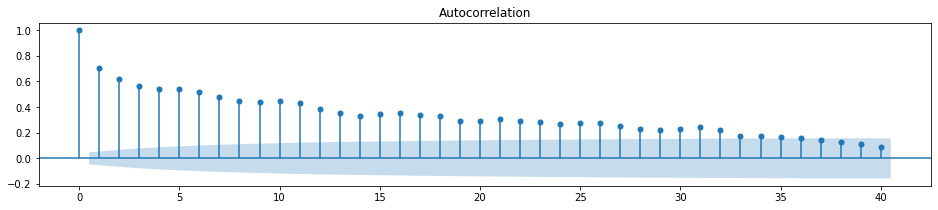

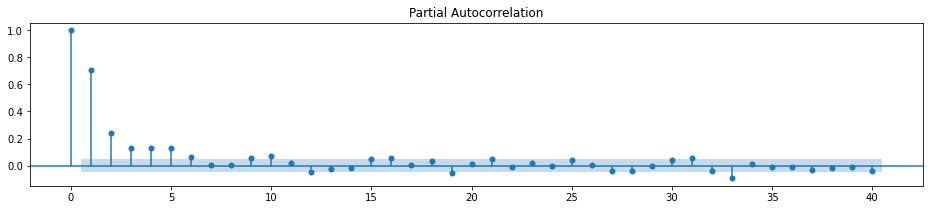

In [159]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Tether'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Tether'], ax=ax, lags=40);